In [1]:
import numpy as np
import seaborn as sns

In [2]:
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, size=(100,))

In [3]:
X

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

In [4]:
# Plot X with hue based on y
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

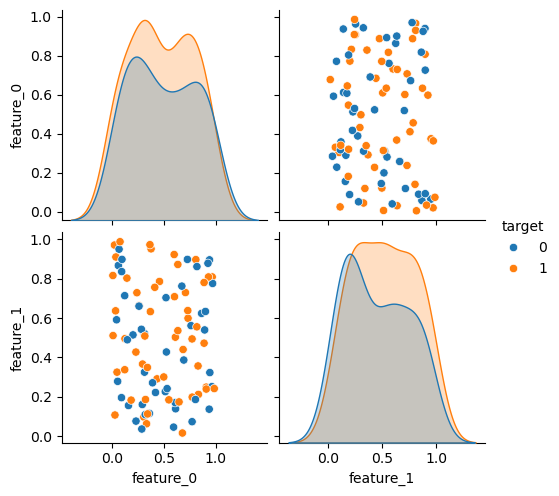

In [5]:
sns.pairplot(df, hue='target')

In [84]:
w = np.array([0.5, -0.2])
b = 0.5
z = X.dot(w) + b
learning_rate = 0.1

In [85]:
f_w_b = 1 / (1 + np.exp(-z))

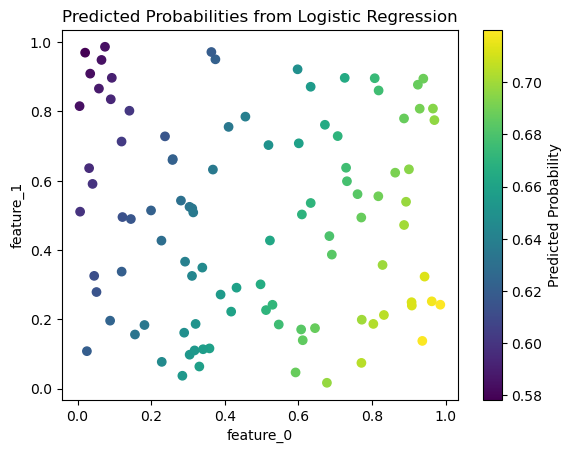

In [86]:
#  plot fwb
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=f_w_b, cmap='viridis')
plt.colorbar(label='Predicted Probability')
plt.xlabel('feature_0')
plt.ylabel('feature_1')
plt.title('Predicted Probabilities from Logistic Regression')
plt.show()

In [87]:
losses = []

In [88]:
def cost_function(X, y, w, b):
    m = len(y)      
    z = X.dot(w) + b
    f_w_b = 1 / (1 + np.exp(-z))
    loss_fn = -y * np.log(f_w_b) - (1 - y) * np.log(1 - f_w_b)
    cost = 1/m * np.sum(loss_fn)
    return cost

In [89]:
prev_cost = None
new_cost = None
cost_history = []

In [90]:
while prev_cost is None or abs(prev_cost - new_cost) > 1e-6:
    m = len(y)
    prev_cost = new_cost
    new_cost = cost_function(X, y, w, b)
    cost_history.append(new_cost)
    
    z = X.dot(w) + b
    f_w_b = 1 / (1 + np.exp(-z))
    error = f_w_b - y
        
    for j in range(X.shape[1]):
        d_dw = 1/m * np.sum((error * X[:,j]))
        w[j] -= (learning_rate * d_dw)
    d_db = 1/m * np.sum(error)
    b -= (learning_rate * d_db)

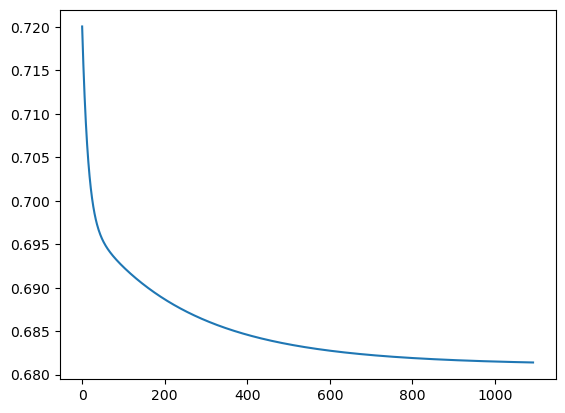

In [91]:
plt.plot(cost_history)

In [242]:
import numpy as np


class LogisticRegression:
    def __init__(self, learning_rate=0.5, epsi1on=1e-6, _lambda=0, max_iter=10000):
        self.learning_rate = learning_rate
        self.epsi1on = epsi1on
        self._lambda = _lambda
        self.max_iter = max_iter
        self.w = None
        self.b = None

    def _cost_function(self, X, y, w, b):
        m = len(y)
        z = X.dot(w) + b
        f_w_b = 1 / (1 + np.exp(-z))
        loss_fn = -y * np.log(f_w_b) - (1 - y) * np.log(1 - f_w_b)
        cost = 1/m * np.sum(loss_fn) + ((self._lambda/(2*m)) * np.sum(w**2))
        return cost

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0

        prev_cost = None
        new_cost = None

        for _ in range(self.max_iter):
            m = len(y)
            prev_cost = new_cost
            new_cost = self._cost_function(X, y, self.w, self.b)

            if (prev_cost is not None and
                    abs(prev_cost - new_cost) <= 1e-6):
                break

            z = X.dot(self.w) + self.b
            f_w_b = 1 / (1 + np.exp(-z))
            error = f_w_b - y

            for j in range(X.shape[1]):
                d_dw = 1/m * np.sum((error * X[:, j])) + ((self._lambda/m)*self.w[j])
                self.w[j] -= (self.learning_rate * d_dw)
            d_db = 1/m * np.sum(error)
            self.b -= (self.learning_rate * d_db)

    def predict_proba(self, X):
        z = X.dot(self.w) + self.b
        f_w_b = 1 / (1 + np.exp(-z))
        return f_w_b

    def predict(self, X, threshold=0.5):
        z = X.dot(self.w) + self.b
        f_w_b = 1 / (1 + np.exp(-z))
        return (f_w_b >= threshold).astype(int)


In [246]:
log_reg = LogisticRegression(_lambda=0.1)
log_reg.fit(X, y)

In [247]:
y_pred_proba = log_reg.predict_proba(X)

In [248]:
y_pred = log_reg.predict(X, threshold=0.5)

In [249]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [250]:
y_pred_proba

array([0.63445204, 0.56145578, 0.50486625, 0.63160407, 0.58531551,
       0.6498801 , 0.48931969, 0.50876143, 0.56443874, 0.51846397,
       0.48471316, 0.53703943, 0.60381028, 0.56648472, 0.4689479 ,
       0.49038687, 0.64493428, 0.5892462 , 0.48888826, 0.53534524,
       0.56603968, 0.63953706, 0.59000831, 0.56334152, 0.49523142,
       0.58336594, 0.60497531, 0.62177776, 0.51452054, 0.53906658,
       0.5165684 , 0.51511782, 0.56843578, 0.61800823, 0.65076945,
       0.48917352, 0.62504058, 0.58504794, 0.46710054, 0.49008655,
       0.56088868, 0.48183869, 0.52904484, 0.56834079, 0.53338205,
       0.60374522, 0.55382754, 0.54156365, 0.53918551, 0.50125308,
       0.59382574, 0.5612316 , 0.49304671, 0.60041962, 0.48807642,
       0.50074161, 0.59051262, 0.61204047, 0.48582957, 0.54503678,
       0.60994938, 0.49058162, 0.55015991, 0.60357052, 0.57301803,
       0.5067374 , 0.53843308, 0.50484545, 0.58746232, 0.63829914,
       0.49141572, 0.51771198, 0.47884394, 0.54917826, 0.53057

In [251]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [252]:
TP = np.sum((y_pred == 1) & (y == 1))
TN = np.sum((y_pred == 0) & (y == 0))
FP = np.sum((y_pred == 1) & (y == 0))
FN = np.sum((y_pred == 0) & (y == 1))

In [253]:
prec = TP / (TP + FP)
prec

0.5641025641025641

In [254]:
recall = TP / (TP + FN)
recall

0.8

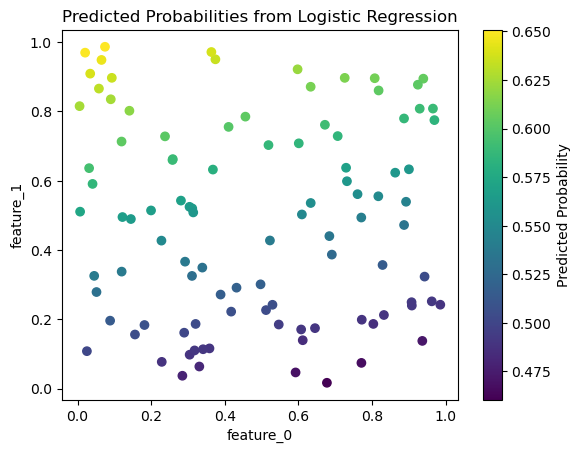

In [255]:
# model fit visualization
plt.scatter(X[:, 0], X[:, 1], c=y_pred_proba, cmap='viridis')
plt.colorbar(label='Predicted Probability')
plt.xlabel('feature_0')
plt.ylabel('feature_1')
plt.title('Predicted Probabilities from Logistic Regression')
plt.show()